## 필요한 라이브러리 설치

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf
  !pip install category_encoders==2.*
  !pip install pandas-profiling==2.*
  !pip install plotly==4.*
  !pip install eli5
  !pip install pdpbox
  !pip install shap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (21.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

     |████████████████████████████████| 564 kB 5.2 MB/s 


## 타자 데이터 ( PO진출 선수 예측하기 )


### 데이터 불러오기

In [ ]:
import pandas as pd

batter_1982_2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/1982_2021_batter.csv", index_col = 0)
batter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/2021_batter.csv", index_col = 0)
Golden_Glove = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/Golden_Glove.csv", index_col = 0)
KT_batter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/kt_batter.csv", index_col = 0)

### 데이터 설명
    - OPS : On-base Plus Slugging, 출루율 + 장타율
    - wOBA : Weighted On Base Average, 가중 출루율
    - wRC+ : Weighted Runs Created, 조정 득점 창출력 ( = 타자의 득점 생산력 )
    - WAR+ : Wins Above Replacement, 대체 수준 대비 승리 기여
    - 희비 : 희생플라이
    - 희타 : 희생번트 + 희생타

### EDA

In [ ]:
batter.head()

,선수,G,타석,타수,득점,안타,2타,3타,홈런,루타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,WPA,생일
0,홍창기21LCF,144,651,524,103,172,26,2,4,214,...,2,0.328,0.456,0.408,0.865,0.417,152.6,6.98,4.47,1993-11-21
1,이정후21키CF,123,543,463,78,167,42,6,7,242,...,9,0.361,0.438,0.523,0.961,0.441,165.8,6.73,3.17,1998-08-20
2,강백호21K1B,142,627,516,76,179,40,1,16,269,...,8,0.347,0.450,0.521,0.971,0.443,165.5,6.35,5.78,1999-07-29
3,최정21S3B,134,555,436,92,121,17,1,35,245,...,12,0.278,0.410,0.562,0.972,0.431,155.9,6.14,5.40,1987-02-28
4,양의지21NDH,141,570,480,81,156,29,2,30,279,...,10,0.325,0.414,0.581,0.995,0.443,165.4,5.74,5.64,1987-06-05


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(batter, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
batter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      390 non-null    object 
 1   G       390 non-null    int64  
 2   타석      390 non-null    int64  
 3   타수      390 non-null    int64  
 4   득점      390 non-null    int64  
 5   안타      390 non-null    int64  
 6   2타      390 non-null    int64  
 7   3타      390 non-null    int64  
 8   홈런      390 non-null    int64  
 9   루타      390 non-null    int64  
 10  타점      390 non-null    int64  
 11  도루      390 non-null    int64  
 12  도실      390 non-null    int64  
 13  볼넷      390 non-null    int64  
 14  사구      390 non-null    int64  
 15  고4      390 non-null    int64  
 16  삼진      390 non-null    int64  
 17  병살      390 non-null    int64  
 18  희타      390 non-null    int64  
 19  희비      390 non-null    int64  
 20  타율      240 non-null    float64
 21  출루      240 non-null    float64
 22  장타

In [ ]:
batter.isnull().sum()

선수        0
G         0
타석        0
타수        0
득점        0
안타        0
2타        0
3타        0
홈런        0
루타        0
타점        0
도루        0
도실        0
볼넷        0
사구        0
고4        0
삼진        0
병살        0
희타        0
희비        0
타율      150
출루      150
장타      150
OPS     150
wOBA    150
wRC+    150
WAR+      0
WPA       0
생일        0
dtype: int64

In [ ]:
batter.dtypes

선수       object
G         int64
타석        int64
타수        int64
득점        int64
안타        int64
2타        int64
3타        int64
홈런        int64
루타        int64
타점        int64
도루        int64
도실        int64
볼넷        int64
사구        int64
고4        int64
삼진        int64
병살        int64
희타        int64
희비        int64
타율      float64
출루      float64
장타      float64
OPS     float64
wOBA    float64
wRC+    float64
WAR+    float64
WPA     float64
생일       object
dtype: object

### Feature Engineering

#### 선수 이름

In [ ]:
# 이름 분리 해서, '이름' column 추가
batter['이름'] = batter['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])

# 기존 '선수' column 에 있던 이름 정보 제거
batter['선수'] = batter.apply(lambda x: x['선수'].replace(x['이름'], ''), axis=1)

#### 시즌

In [ ]:
# '시즌' column 생성
batter['시즌'] = batter['선수'].apply(lambda x: x[:2])

# 기존 '선수' column 에 있던 시즌 정보 제거
batter['선수'] = batter.apply(lambda x: x['선수'].replace(x['시즌'],''), axis=1)

# 시즌 데이터 추출
batter['시즌'] = batter['시즌'].apply(lambda x: int("20"+ x) if int(x) < 30 else int("19"+x))

#### 선수 나이

In [ ]:
batter['나이'] = batter["생일"].apply(lambda x : (2022 - int(x.split("-")[0]) if int(x.split("-")[2]) < 3 else (2021-int(x.split("-")[0]))))

#### 선수 수비 포지션

In [ ]:
import numpy as np
# 포지션
position = ['1B', '2B', '3B', 'SS', 'C', 'RF', 'LF', 'CF', 'DH'] 

# 포지션 여부 확인
batter['포지션여부'] = batter['선수'].apply(lambda x : (np.isin(x[-2:], position) or np.isin(x[-1:], position))) 

# 포지션 분리
batter['포지션'] = batter['선수'].apply(lambda x: x[-2:] if x[-2:] in position else x[-1:])

batter.loc[batter['포지션여부']==False, '포지션'] = np.nan

batter['팀'] = batter.apply(lambda x: x['선수'].replace(x['포지션'],'') if type(x['포지션'])==str else x['선수'], axis=1)

#### 필요 없는 특성제거

In [ ]:
batter.drop(["선수","생일"], axis=1, inplace = True)
batter.head()

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,wOBA,wRC+,WAR+,WPA,이름,시즌,나이,포지션여부,포지션,팀
0,144,651,524,103,172,26,2,4,214,52,...,0.417,152.6,6.98,4.47,홍창기,2021,28,True,CF,L
1,123,543,463,78,167,42,6,7,242,84,...,0.441,165.8,6.73,3.17,이정후,2021,23,True,CF,키
2,142,627,516,76,179,40,1,16,269,102,...,0.443,165.5,6.35,5.78,강백호,2021,22,True,1B,K
3,134,555,436,92,121,17,1,35,245,100,...,0.431,155.9,6.14,5.40,최정,2021,34,True,3B,S
4,141,570,480,81,156,29,2,30,279,111,...,0.443,165.4,5.74,5.64,양의지,2021,34,True,DH,N


#### 너무 작은 경기 수의 선수 데이터 제거

In [ ]:
# 20타석 이상 출전한 선수들로만 구성
batter = batter.query("타석 > 20").copy()
batter.head()

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,wOBA,wRC+,WAR+,WPA,이름,시즌,나이,포지션여부,포지션,팀
0,144,651,524,103,172,26,2,4,214,52,...,0.417,152.6,6.98,4.47,홍창기,2021,28,True,CF,L
1,123,543,463,78,167,42,6,7,242,84,...,0.441,165.8,6.73,3.17,이정후,2021,23,True,CF,키
2,142,627,516,76,179,40,1,16,269,102,...,0.443,165.5,6.35,5.78,강백호,2021,22,True,1B,K
3,134,555,436,92,121,17,1,35,245,100,...,0.431,155.9,6.14,5.40,최정,2021,34,True,3B,S
4,141,570,480,81,156,29,2,30,279,111,...,0.443,165.4,5.74,5.64,양의지,2021,34,True,DH,N


#### 포지션 결측치 대체

In [ ]:
# 포지션이 설정 되어있지 않은 선수 포지션 채워주기
batter.loc[(batter.이름 =='전민수'),'포지션'] = 'CF'
batter.loc[(batter.이름 =='전민수'),'포지션여부'] = True
batter.loc[(batter.이름 =='이병규'),'포지션'] = 'DH'
batter.loc[(batter.이름 =='이병규'),'포지션여부'] = True
batter.drop(["포지션여부", "WPA"], axis = 1, inplace = True)

In [ ]:
batter.dropna(inplace = True)

#### 1982년 ~ 2021년 데이터 불러오기

In [ ]:
batter_1982_2021.drop("포지션여부", axis = 1, inplace = True)
batter_1982_2021

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,장타,OPS,wOBA,wRC+,WAR+,이름,시즌,나이,포지션,팀
0,3,1,1,0,1,0,0,0,1,0,...,1.000,2.000,0.955,NaN,0.05,가득염,2008,40,NaN,SP
1,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0.00,가득염,2010,42,NaN,SP
2,72,292,268,37,66,12,0,18,132,61,...,0.493,0.801,0.360,116.7,1.42,가르시아,2011,37,RF,한
3,118,485,429,73,108,16,1,26,204,83,...,0.476,0.803,0.356,109.3,2.40,가르시아,2010,36,RF,롯
4,125,513,460,68,130,25,2,30,249,111,...,0.541,0.894,0.399,144.9,4.55,가르시아,2008,34,RF,롯
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8895,80,303,260,42,82,15,0,14,139,61,...,0.535,0.944,0.415,134.6,1.94,히메네스,2014,33,1B,롯
8896,70,299,279,37,87,17,2,11,141,46,...,0.505,0.850,0.370,122.5,1.97,히메네스,2015,28,3B,L
8897,135,579,523,101,161,36,0,26,275,102,...,0.526,0.889,0.388,126.8,4.85,히메네스,2016,29,3B,L
8898,51,198,181,29,50,6,1,7,79,30,...,0.436,0.770,0.341,100.6,0.81,히메네스,2017,30,3B,L


In [ ]:
batter_1982_2021.isnull().sum()

G          0
타석         0
타수         0
득점         0
안타         0
2타         0
3타         0
홈런         0
루타         0
타점         0
도루         0
도실         0
볼넷         0
사구         0
고4         0
삼진         0
병살         0
희타         0
희비         0
타율      2400
출루      1900
장타      2400
OPS     2400
wOBA    1900
wRC+    2400
WAR+       0
이름         0
시즌         0
나이         0
포지션     2558
팀          0
dtype: int64

#### 기존데이터와 merge로 합쳐주기

In [ ]:
batter = pd.merge(batter, batter_1982_2021, how= 'outer')
# batter = batter.query("이름 in @p").reset_index(drop =True)
batter.duplicated()
batter

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,장타,OPS,wOBA,wRC+,WAR+,이름,시즌,나이,포지션,팀
0,144,651,524,103,172,26,2,4,214,52,...,0.408,0.865,0.417,152.6,6.98,홍창기,2021,28,CF,L
1,123,543,463,78,167,42,6,7,242,84,...,0.523,0.961,0.441,165.8,6.73,이정후,2021,23,CF,키
2,142,627,516,76,179,40,1,16,269,102,...,0.521,0.971,0.443,165.5,6.35,강백호,2021,22,1B,K
3,134,555,436,92,121,17,1,35,245,100,...,0.562,0.972,0.431,155.9,6.14,최정,2021,34,3B,S
4,141,570,480,81,156,29,2,30,279,111,...,0.581,0.995,0.443,165.4,5.74,양의지,2021,34,DH,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,80,303,260,42,82,15,0,14,139,61,...,0.535,0.944,0.415,134.6,1.94,히메네스,2014,33,1B,롯
9092,70,299,279,37,87,17,2,11,141,46,...,0.505,0.850,0.370,122.5,1.97,히메네스,2015,28,3B,L
9093,135,579,523,101,161,36,0,26,275,102,...,0.526,0.889,0.388,126.8,4.85,히메네스,2016,29,3B,L
9094,51,198,181,29,50,6,1,7,79,30,...,0.436,0.770,0.341,100.6,0.81,히메네스,2017,30,3B,L


#### 이름과 시즌을 기준으로 데이터 정렬

In [ ]:
batter = batter.sort_values(by = ["이름", "시즌"]).reset_index(drop =True)

#### 너무 작은 경기 수의 데이터제거

In [ ]:
batter = batter.query("타석 > 20").copy()
batter.dropna(inplace = True)

In [ ]:
batter.columns

Index(['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실',
       '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루', '장타', 'OPS',
       'wOBA', 'wRC+', 'WAR+', '이름', '시즌', '나이', '포지션', '팀'],
      dtype='object')

#### 역대 Golden_Glove 수상자들

In [ ]:
Golden_Glove_batter = Golden_Glove.copy()
Golden_Glove_batter["포수"] = Golden_Glove_batter["포수"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["1루수"] = Golden_Glove_batter["1루수"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["2루수"] = Golden_Glove_batter["2루수"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["3루수"] = Golden_Glove_batter["3루수"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["유격수"] = Golden_Glove_batter["유격수"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["외야수1"] = Golden_Glove_batter["외야수1"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["외야수2"] = Golden_Glove_batter["외야수2"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["외야수3"] = Golden_Glove_batter["외야수3"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["지명타자"] = Golden_Glove_batter["지명타자"].apply(lambda x: x.split("-")[0])
Golden_Glove_batter["연도"] = Golden_Glove_batter.연도.str.replace("년","").astype('int64')
Golden_Glove_batter.drop("투수",axis =1, inplace = True)


In [ ]:
Golden_Glove_batter = Golden_Glove_batter.T
Golden_Glove_batter = Golden_Glove_batter.rename(columns=Golden_Glove_batter.iloc[0]).drop(Golden_Glove_batter.index[0])
Golden_Glove_batter

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
포수,강민호,양의지,양의지,양의지,강민호,양의지,양의지,양의지,강민호,강민호,...,장채근,김동수,유승안,장채근,이만수,이만수,이만수,이만수,이만수,김용운
1루수,강백호,강백호,박병호,박병호,이대호,테임즈,테임즈,박병호,박병호,박병호,...,김성한,김상훈,김성한,김성한,김성한,김성한,김성한,김용철,신경식,김용달
2루수,정은원,박민우,박민우,안치홍,안치홍,서건창,나바로,서건창,정근우,서건창,...,박정태,강기웅,강기웅,김성래,김성래,김성래,정구선,정구선,정구선,차영화
3루수,최정,황재균,최정,허경민,최정,최정,박석민,박석민,최정,최정,...,한대화,한대화,한대화,한대화,한대화,한대화,이순철,이광은,김용희,김용희
유격수,김혜성,김하성,김하성,김하성,김선빈,김재호,김재호,강정호,강정호,강정호,...,류중일,장종훈,김재박,장종훈,류중일,김재박,김재박,김재박,김재박,오대석
외야수1,구자욱,김현수,로하스,김재환,버나디나,김재환,김현수,나성범,박용택,박용택,...,이순철,이강돈,고원부,이강돈,김종모,김종모,박종훈,김종모,김종모,김성관
외야수2,이정후,로하스,샌즈,이정후,손아섭,김주찬,나성범,손아섭,손아섭,손아섭,...,이정훈,이정훈,김일권,순철,이광은,이광은,이광은,장효조,박종훈,김준환
외야수3,홍창기,이정후,이정후,전준우,최형우,최형우,유한준,최형우,최형우,이용규,...,이호성,이호성,이강돈,이정훈,장효조,장효조,장효조,홍문종,장효조,양승관
지명타자,양의지,최형우,페르난데스,이대호,박용택,김태균,이승엽,이승엽,이병규,이승엽,...,장종훈,박승호,박철우,김용철,유승안,김봉연,김용희,양세종,,


In [ ]:
Golden_Glove_batter_list = []
for col in Golden_Glove_batter.columns:
  Golden_Glove_batter_list = list(Golden_Glove_batter[col])
  batter.loc[(batter["시즌"] == col) & (batter["이름"].isin(Golden_Glove_batter_list)), "Golden_Glove"] = 1

In [ ]:
batter['Golden_Glove'] = batter.Golden_Glove.fillna(0).astype('int64')

#### 팀 이름을 풀 네임으로 변경

In [ ]:
KT_batter['이름'] = KT_batter['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])
KT_batter_list = list(set(KT_batter["이름"]))

In [ ]:
batter["팀"] = batter["팀"].apply(lambda x: x[-1])

In [ ]:
batter.팀.unique()

array(['한', '롯', 'L', '삼', 'K', '현', '히', '넥', '두', 'N', '빙', 'S', 'O',
       '태', '쌍', '해', '청', 'M', '키', 'k'], dtype=object)

##### K 는 KIA타이거즈와 KT위즈 두개가 겹침

In [ ]:
batter[batter["팀"] == "K"]

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,OPS,wOBA,wRC+,WAR+,이름,시즌,나이,포지션,팀,Golden_Glove
16,26,39,33,3,5,0,0,0,5,1,...,0.434,0.237,31.3,-0.21,강경학,2021,29,2B,K,0
17,26,39,33,3,5,0,0,0,5,1,...,0.434,0.237,31.3,-0.21,강경학,2021,30,2B,K,0
89,58,94,88,12,24,0,1,0,26,7,...,0.615,0.295,72.6,0.28,강민국,2019,28,SS,K,0
90,18,50,45,2,11,2,0,0,13,4,...,0.581,0.270,50.6,-0.10,강민국,2021,29,2B,K,0
91,18,50,45,2,11,2,0,0,13,4,...,0.581,0.270,50.6,-0.10,강민국,2021,30,2B,K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,134,600,541,108,169,35,5,21,277,97,...,0.882,0.391,129.6,5.13,황재균,2020,34,3B,K,1
9075,117,507,453,74,132,16,2,10,182,56,...,0.760,0.356,108.4,2.93,황재균,2021,34,3B,K,0
9076,117,507,453,74,132,16,2,10,182,56,...,0.760,0.356,108.4,2.93,황재균,2021,35,3B,K,0
9077,18,57,47,4,7,0,0,1,10,5,...,0.511,0.265,57.8,-0.14,황정립,2012,24,1B,K,0


In [ ]:
# 팀명 변경
batter.loc[batter["팀"].isin(["롯"]), "팀"] = "롯데자이언츠"
batter.loc[batter["팀"].isin(["한", "빙"]), "팀"] = "한화이글스"
batter.loc[batter["팀"].isin(["삼"]), "팀"] = "삼성라이온즈"
batter.loc[batter["팀"].isin(["두", "O"]), "팀"] = "두산베어스"
batter.loc[batter["팀"].isin(["N"]), "팀"] = "NC다이노스"
batter.loc[batter["팀"].isin(["키", "히", "넥"]), "팀"] = "키움히어로즈"
batter.loc[batter["팀"].isin(["현", "태", "청"]), "팀"] = "현대유니콘스"
batter.loc[batter["팀"].isin(["M","L"]), "팀"] = "LG트윈스"
batter.loc[batter["팀"].isin(["해"]), "팀"] = "KIA타이거즈"
batter.loc[batter["팀"].isin(["쌍"]), "팀"] = "쌍방울레이더스"
batter.loc[batter["팀"].isin(["K","k"]), "팀"] = "KIA타이거즈"
batter.loc[(batter["팀"] == "KIA타이거즈") & (batter["이름"].isin(KT_batter_list)), "팀"] = "KT위즈"
batter.loc[batter["팀"].isin(["S"]), "팀"] = "SSG랜더스"

In [ ]:
# 소속팀 시즌 플레이오프 출전 여부 특성
batter.loc[(batter["팀"] == "KIA타이거즈") & (batter["시즌"].isin([1983, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1996, 1997, 2002, 2003, 2004, 
                                                                   2006, 2009, 2011, 2016, 2017, 2018])), "PO"] = 1
batter.loc[(batter["팀"] == "삼성라이온즈") & (batter["시즌"].isin([1982, 1984, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1997, 1998, 1999, 2000, 2001, 
                                                                    2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2021])), "PO"] = 1
batter.loc[(batter["팀"] == "두산베어스") & (batter["시즌"].isin([1982, 1986, 1987, 1993, 1995, 1998, 1999, 2000, 2001, 2004, 2005, 2007, 2008, 2009, 2010,
                                                                  2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021])), "PO"] = 1
batter.loc[(batter["팀"] == "현대유니콘스") & (batter["시즌"].isin([1989, 1994, 1996, 1998, 2000, 2001, 2002, 2003, 2004, 2006])), "PO"] = 1
batter.loc[(batter["팀"] == "SSG랜더스") & (batter["시즌"].isin([2003, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2015, 2017, 2018, 2019])), "PO"] = 1
batter.loc[(batter["팀"] == "LG트윈스") & (batter["시즌"].isin([1983, 1990, 1993, 1994, 1995, 1997, 1998, 2000, 2002, 2013, 2014, 2016, 2019, 2020, 2021])), "PO"] = 1
batter.loc[(batter["팀"] == "롯데자이언즈") & (batter["시즌"].isin([1984, 1991, 1992, 1995, 1999, 2000, 2008, 2009, 2010, 2011, 2012, 2017])), "PO"] = 1
batter.loc[(batter["팀"] == "한화이글스") & (batter["시즌"].isin([1988, 1989, 1990, 1991, 1992, 1994, 1996, 1999, 2001, 2005, 2006, 2007, 2018])), "PO"] = 1
batter.loc[(batter["팀"] == "키움히어로즈") & (batter["시즌"].isin([2013, 2014, 2015, 2016, 2018, 2019, 2020, 2021])), "PO"] = 1
batter.loc[(batter["팀"] == "NC다이노스") & (batter["시즌"].isin([2014, 2015, 2016, 2017, 2019, 2020])), "PO"] = 1
batter.loc[(batter["팀"] == "쌍방울레이더스") & (batter["시즌"].isin([1996, 1997])), "PO"] = 1
batter.loc[(batter["팀"] == "KT위즈") & (batter["시즌"].isin([2020, 2021])), "PO"] = 1
batter["PO"] = batter["PO"].fillna(0).astype('int64')

#### 홈 야구장 중앙 펜스 거리


In [ ]:
batter.loc[(batter["시즌"] >= 2008) & (batter["시즌"] <= 2015) & (batter["팀"] == "키움히어로즈"), "중앙펜스"] = 118
batter.loc[(batter["시즌"] >= 2016) & (batter["시즌"] <= 2021) & (batter["팀"] == "키움히어로즈"), "중앙펜스"] = 125
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2013) & (batter["팀"] == "KIA타이거즈"), "중앙펜스"] = 120
batter.loc[(batter["시즌"] >= 2014) & (batter["시즌"] <= 2021) & (batter["팀"] == "KIA타이거즈"), "중앙펜스"] = 121
batter.loc[(batter["시즌"] >= 1990) & (batter["시즌"] <= 1999) & (batter["팀"] == "쌍방울레이더스"), "중앙펜스"] = 110
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2015) & (batter["팀"] == "삼성라이온즈"), "중앙펜스"] = 120
batter.loc[(batter["시즌"] >= 2016) & (batter["시즌"] <= 2021) & (batter["팀"] == "삼성라이온즈"), "중앙펜스"] = 122
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2002) & (batter["팀"] == "한화이글스"), "중앙펜스"] = 115
batter.loc[(batter["시즌"] >= 2003) & (batter["시즌"] <= 2012) & (batter["팀"] == "한화이글스"), "중앙펜스"] = 114
batter.loc[(batter["시즌"] >= 2013) & (batter["시즌"] <= 2021) & (batter["팀"] == "한화이글스"), "중앙펜스"] = 122
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2021) & (batter["팀"] == "LG트윈스"), "중앙펜스"] = 125
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 1984) & (batter["팀"] == "두산베어스"), "중앙펜스"] = 115
batter.loc[(batter["시즌"] >= 1985) & (batter["시즌"] <= 2021) & (batter["팀"] == "두산베어스"), "중앙펜스"] = 125
batter.loc[(batter["시즌"] >= 2012) & (batter["시즌"] <= 2018) & (batter["팀"] == "NC다이노스"), "중앙펜스"] = 116
batter.loc[(batter["시즌"] >= 2019) & (batter["시즌"] <= 2021) & (batter["팀"] == "NC다이노스"), "중앙펜스"] = 121
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 1985) & (batter["팀"] == "롯데자이언츠"), "중앙펜스"] = 110
batter.loc[(batter["시즌"] >= 1986) & (batter["시즌"] <= 2021) & (batter["팀"] == "롯데자이언츠"), "중앙펜스"] = 118
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 1988) & (batter["팀"] == "현대유니콘스"), "중앙펜스"] = 110
batter.loc[(batter["시즌"] >= 1989) & (batter["시즌"] <= 2007) & (batter["팀"] == "현대유니콘스"), "중앙펜스"] = 120
batter.loc[(batter["시즌"] >= 2015) & (batter["시즌"] <= 2021) & (batter["팀"] == "KT위즈"), "중앙펜스"] = 120
batter.loc[(batter["시즌"] >= 2000) & (batter["시즌"] <= 2001) & (batter["팀"] == "SSG랜더스"), "중앙펜스"] = 110
batter.loc[(batter["시즌"] >= 2002) & (batter["시즌"] <= 2021) & (batter["팀"] == "SSG랜더스"), "중앙펜스"] = 120

#### 홈 야구장 펜스 높이

In [ ]:
batter.loc[(batter["시즌"] >= 2008) & (batter["시즌"] <= 2015) & (batter["팀"] == "키움히어로즈"), "펜스높이"] = 2
batter.loc[(batter["시즌"] >= 2016) & (batter["시즌"] <= 2021) & (batter["팀"] == "키움히어로즈"), "펜스높이"] = 3
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2013) & (batter["팀"] == "KIA타이거즈"), "펜스높이"] = 3
batter.loc[(batter["시즌"] >= 2014) & (batter["시즌"] <= 2021) & (batter["팀"] == "KIA타이거즈"), "펜스높이"] = 3
batter.loc[(batter["시즌"] >= 1990) & (batter["시즌"] <= 1995) & (batter["팀"] == "쌍방울레이더스"), "펜스높이"] = 2.1
batter.loc[(batter["시즌"] >= 1996) & (batter["시즌"] <= 1999) & (batter["팀"] == "쌍방울레이더스"), "펜스높이"] = 5.8
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2015) & (batter["팀"] == "삼성라이온즈"), "펜스높이"] = 3
batter.loc[(batter["시즌"] >= 2016) & (batter["시즌"] <= 2021) & (batter["팀"] == "삼성라이온즈"), "펜스높이"] = 3
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2012) & (batter["팀"] == "한화이글스"), "펜스높이"] = 2.5
batter.loc[(batter["시즌"] >= 2013) & (batter["시즌"] <= 2021) & (batter["팀"] == "한화이글스"), "펜스높이"] = 4
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 2021) & (batter["팀"] == "LG트윈스"), "펜스높이"] = 2.6
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 1984) & (batter["팀"] == "두산베어스"), "펜스높이"] = 2.5
batter.loc[(batter["시즌"] >= 1985) & (batter["시즌"] <= 2021) & (batter["팀"] == "두산베어스"), "펜스높이"] = 2.6
batter.loc[(batter["시즌"] >= 2012) & (batter["시즌"] <= 2018) & (batter["팀"] == "NC다이노스"), "펜스높이"] = 3.8
batter.loc[(batter["시즌"] >= 2019) & (batter["시즌"] <= 2021) & (batter["팀"] == "NC다이노스"), "펜스높이"] = 3
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 1985) & (batter["팀"] == "롯데자이언츠"), "펜스높이"] = 2.2
batter.loc[(batter["시즌"] >= 1986) & (batter["시즌"] <= 2021) & (batter["팀"] == "롯데자이언츠"), "펜스높이"] = 6
batter.loc[(batter["시즌"] >= 1982) & (batter["시즌"] <= 1988) & (batter["팀"] == "현대유니콘스"), "펜스높이"] = 4.8
batter.loc[(batter["시즌"] >= 1989) & (batter["시즌"] <= 2007) & (batter["팀"] == "현대유니콘스"), "펜스높이"] = 4
batter.loc[(batter["시즌"] >= 2015) & (batter["시즌"] <= 2021) & (batter["팀"] == "KT위즈"), "펜스높이"] = 4
batter.loc[(batter["시즌"] >= 2000) & (batter["시즌"] <= 2001) & (batter["팀"] == "SSG랜더스"), "펜스높이"] = 4.8
batter.loc[(batter["시즌"] >= 2002) & (batter["시즌"] <= 2021) & (batter["팀"] == "SSG랜더스"), "펜스높이"] = 2.8

#### 중앙펜스 120M를 기준으로 타자친화 투수친화로 나눔

    - 투수친화 : 중앙펜스 거리가 멀기때문에 상대적으로 투수에게 유리한 구장 (1)
    - 타자친화 : 중앙펜스 거리가 짧기때문에 상대적으로 타자에게 유리한 구장 (0)
    - 타자들의 지표에서 투수친화가 홈구장임에도 불구하고 높으면 지표가 매우 좋다고 생각함

In [ ]:
batter.loc[batter["중앙펜스"] >= 120, "투수친화"] = 1
batter.loc[batter["중앙펜스"] < 120, "투수친화"] = 0

#### 시즌을 기준으로 타율, 출루, 장타, OPS, wOBA 평균 테이블

In [ ]:
batter_mean = batter.groupby("시즌")['타율', '출루', '장타', 'OPS', 'wOBA'].mean().round(3).reset_index()
batter_mean = batter_mean.set_index('시즌')
batter_mean = batter_mean.T
batter_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


시즌,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
타율,0.265,0.257,0.247,0.264,0.249,0.262,0.270,0.258,0.253,0.251,...,0.246,0.259,0.274,0.275,0.282,0.276,0.277,0.255,0.264,0.243
출루,0.337,0.325,0.321,0.333,0.324,0.334,0.337,0.339,0.336,0.330,...,0.322,0.342,0.351,0.353,0.358,0.341,0.347,0.323,0.339,0.332
장타,0.389,0.364,0.358,0.383,0.351,0.361,0.382,0.359,0.361,0.374,...,0.340,0.371,0.411,0.416,0.425,0.418,0.429,0.364,0.387,0.353
OPS,0.726,0.689,0.680,0.716,0.674,0.694,0.719,0.698,0.697,0.704,...,0.662,0.714,0.762,0.768,0.783,0.759,0.777,0.687,0.727,0.685
wOBA,0.330,0.317,0.315,0.330,0.316,0.326,0.330,0.330,0.327,0.323,...,0.309,0.332,0.342,0.343,0.352,0.334,0.340,0.318,0.331,0.322


In [ ]:
for col in batter_mean.columns:
  batter.loc[(batter["시즌"] == col) & (batter["타율"] >= batter_mean[col].iloc[0]) & (batter["출루"] >= batter_mean[col].iloc[1]) & (batter["장타"] >= batter_mean[col].iloc[2]) & (batter["OPS"] >= batter_mean[col].iloc[3]) & (batter["wOBA"] >= batter_mean[col].iloc[4]), "평균이상타자"] = 1
batter["평균이상타자"].fillna(0, inplace = True)
batter.head()

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,시즌,나이,포지션,팀,Golden_Glove,PO,중앙펜스,펜스높이,투수친화,평균이상타자
2,24,77,73,7,19,3,1,2,30,8,...,2002,28,SS,한화이글스,0,0,115.0,2.5,0.0,0.0
3,125,513,460,68,130,25,2,30,249,111,...,2008,34,RF,롯데자이언츠,1,0,118.0,6.0,0.0,1.0
4,130,539,467,72,124,29,1,29,242,84,...,2009,35,RF,롯데자이언츠,0,0,118.0,6.0,0.0,1.0
5,118,485,429,73,108,16,1,26,204,83,...,2010,36,RF,롯데자이언츠,0,0,118.0,6.0,0.0,0.0
6,72,292,268,37,66,12,0,18,132,61,...,2011,37,RF,한화이글스,0,0,114.0,2.5,0.0,0.0


#### 결측치를 위에 값으로 대체하고 데이터타입 변경

In [ ]:
batter.fillna(method='ffill', inplace = True)
batter["나이"] = batter.나이.astype('int64')
batter["Golden_Glove"] = batter.Golden_Glove.astype('int64')
batter["PO"] = batter.PO.astype('int64')
batter["투수친화"] = batter.투수친화.astype('int64')
batter["평균이상타자"] = batter.평균이상타자.astype('int64')
batter

,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,...,시즌,나이,포지션,팀,Golden_Glove,PO,중앙펜스,펜스높이,투수친화,평균이상타자
2,24,77,73,7,19,3,1,2,30,8,...,2002,28,SS,한화이글스,0,0,115.0,2.5,0,0
3,125,513,460,68,130,25,2,30,249,111,...,2008,34,RF,롯데자이언츠,1,0,118.0,6.0,0,1
4,130,539,467,72,124,29,1,29,242,84,...,2009,35,RF,롯데자이언츠,0,0,118.0,6.0,0,1
5,118,485,429,73,108,16,1,26,204,83,...,2010,36,RF,롯데자이언츠,0,0,118.0,6.0,0,0
6,72,292,268,37,66,12,0,18,132,61,...,2011,37,RF,한화이글스,0,0,114.0,2.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,70,299,279,37,87,17,2,11,141,46,...,2015,28,3B,LG트윈스,0,0,125.0,2.6,1,0
9092,135,579,523,101,161,36,0,26,275,102,...,2016,29,3B,LG트윈스,0,1,125.0,2.6,1,1
9093,51,198,181,29,50,6,1,7,79,30,...,2017,30,3B,LG트윈스,0,0,125.0,2.6,1,0
9094,67,268,249,27,64,11,1,7,98,37,...,2021,29,1B,한화이글스,0,0,122.0,4.0,1,0


#### 특성들의 이름을 좀 더 알아보기 편하게 변경

    - 고의사구 : 투수들이 일부러 타자를 1루로 보내는 작전
    - 규정타석 : 정규리그 144경기 X 3.1배  = 446타석

In [ ]:
batter["1타"] = batter["안타"] - batter["2타"] - batter["3타"] - batter["홈런"]
batter.rename(columns = {'1타':'1루타', '2타':'2루타', '3타':"3루타", "G" : "경기수","고4":"고의사구", "사구":"몸에맞는공"},inplace=True)
batter.loc[batter["타석"] >= 446, "규정타석"] = 1
batter.loc[batter["타석"] < 446, "규정타석"] = 0
batter["규정타석"] = batter.규정타석.astype('int64')

### 타자 데이터 분류문제 ( PO출전 선수 예측 문제 )

#### 데이터 훈련/검증/테스트 셋으로 분리

    - 훈련 : 테스트 이외의 80% 데이터
    - 검증 : 테스트 이외의 20% 데이터
    - 테스트 : 데이터의 80%

In [ ]:
from sklearn.model_selection import train_test_split
batter_train, batter_test = train_test_split(batter, train_size=0.8, random_state=42)
batter_train, batter_val = train_test_split(batter_train, train_size=0.8, random_state=42)
batter_train.shape, batter_val.shape , batter_test.shape

((3249, 39), (813, 39), (1016, 39))

#### Target 지정

In [ ]:
batter_train['PO'].value_counts(normalize=True)

0    0.555556
1    0.444444
Name: PO, dtype: float64

In [ ]:
target = 'PO'
features = batter_train.drop(columns=[target,"시즌","이름"]).columns

X_batter_train = batter_train[features]
y_batter_train = batter_train[target]
X_batter_val = batter_val[features]
y_batter_val = batter_val[target]
X_batter_test = batter_test[features]
y_batter_test = batter_test[target]

#### RandomForest 모델 하이퍼 파라미터 조정 전

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

pipe.fit(X_batter_train, y_batter_train)
print('검증 정확도', pipe.score(X_batter_val, y_batter_val))

검증 정확도 0.7121771217712177


#### 특성 중요도 확인

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,20))
plt.rc('font', family='NanumBarunGothic')
plt.rc('figure', figsize=(15, 15))

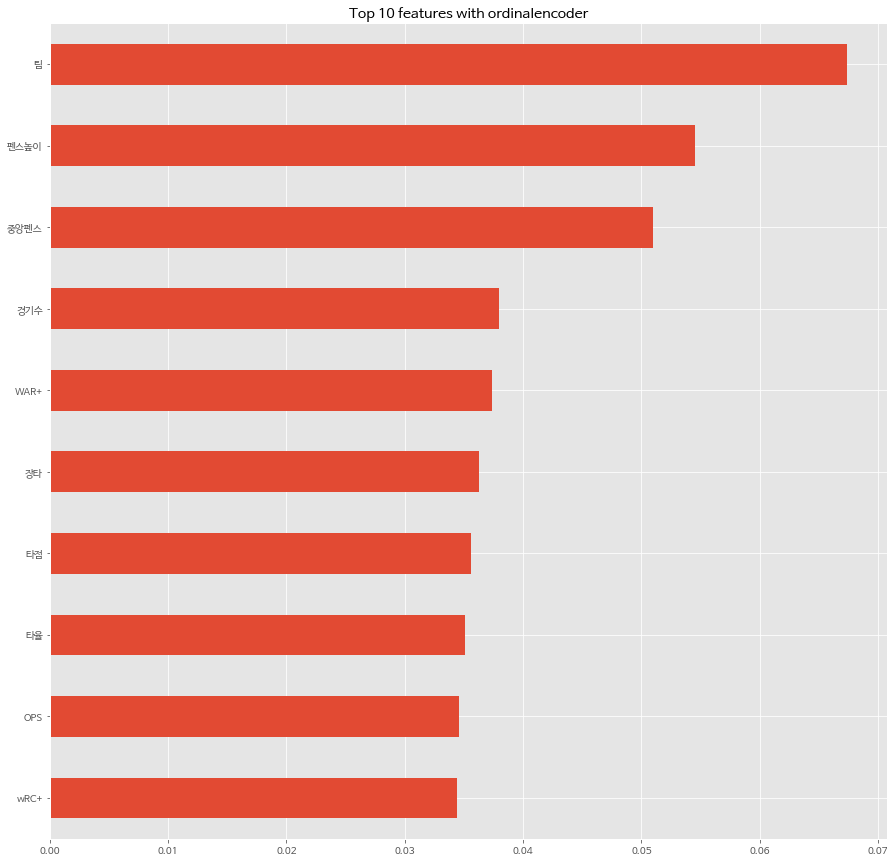

In [ ]:
rf_ord = pipe.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_batter_train.columns)

plt.title(f'Top 10 features with ordinalencoder')
importances_ord.sort_values()[-10:].plot.barh();

##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred = pipe.predict(X_batter_val)
f1_score(y_batter_val, y_pred)

0.6740947075208914

##### Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix, n = 813')

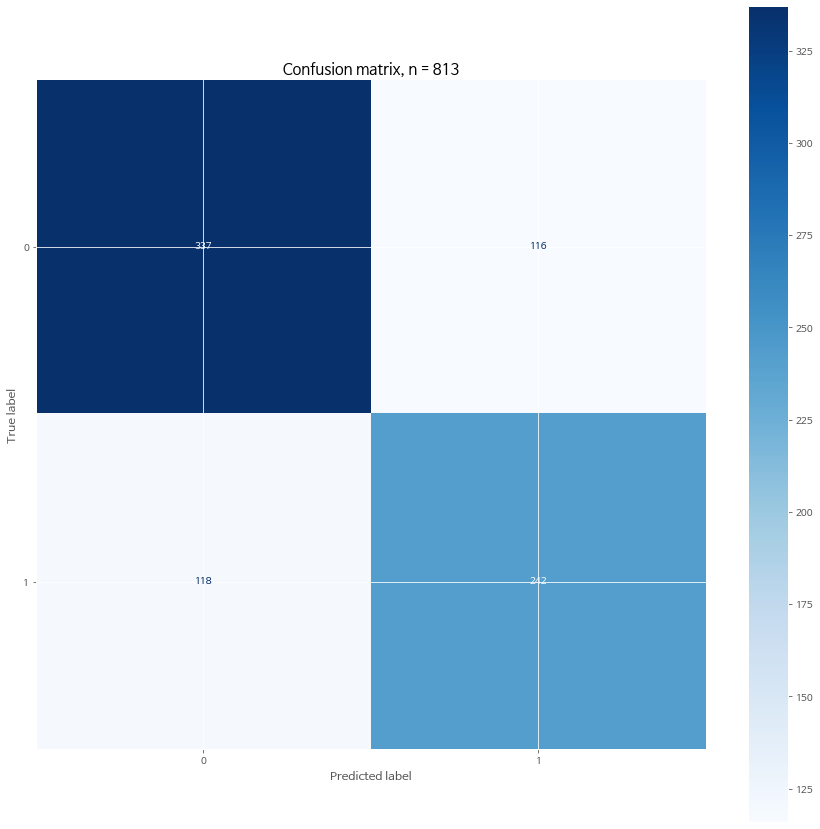

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_batter_val, y_batter_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_batter_val)}', fontsize=15)

#### RandomForest 하이퍼 파라미터 조정 1

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

dists = {       
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': [10, 50, 100], 
    'randomforestclassifier__max_depth': [10, 50, 100],
    'randomforestclassifier__max_features': ['auto','log2'], 
    'randomforestclassifier__class_weight': ['balanced', None]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
최적 하이퍼파라미터:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'mean'}
최적 스코어:  0.6813005461708955


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       453
           1       0.63      0.79      0.70       360

    accuracy                           0.70       813
   macro avg       0.71      0.71      0.70       813
weighted avg       0.72      0.70      0.70       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6977886977886979


##### AUC Score, Roc Curve

AUC score:  0.7895940642629384


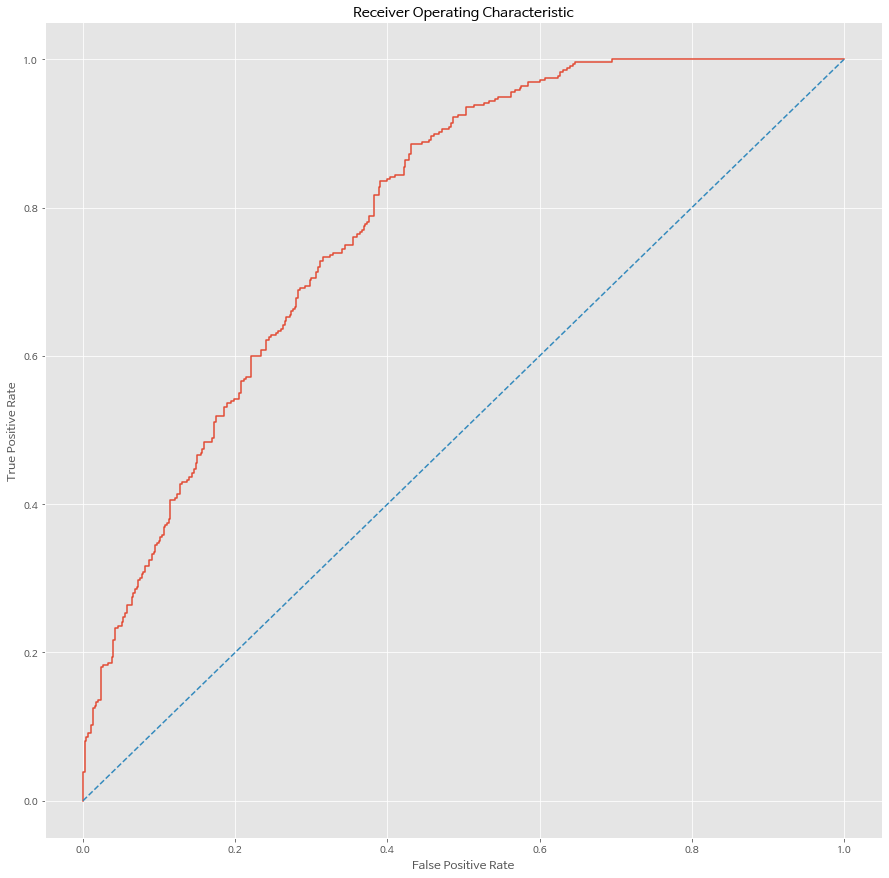

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### RandomForest 하이퍼 파라미터 조정 2

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    RandomForestClassifier(random_state=42, max_features='log2',class_weight='balanced')
)

dists = {        
    'randomforestclassifier__n_estimators': [50, 100, 300], 
    'randomforestclassifier__max_depth': [5 ,10, 30], 
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 300}
최적 스코어:  0.6869170252823444


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       453
           1       0.63      0.80      0.70       360

    accuracy                           0.70       813
   macro avg       0.71      0.71      0.70       813
weighted avg       0.72      0.70      0.70       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.7008547008547008


##### AUC Score, Roc Curve

AUC score:  0.7991108658327202


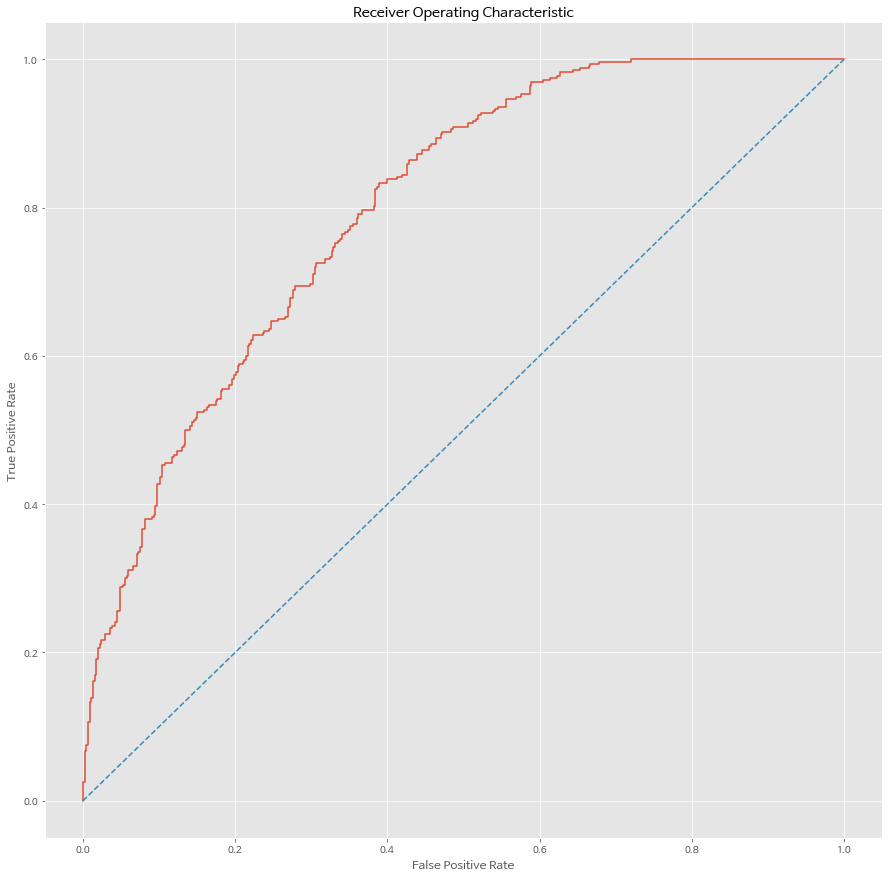

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### RandomForest 하이퍼 파라미터 조정 3

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    RandomForestClassifier(random_state=42, max_features='log2',class_weight='balanced')
)

dists = {        
    'randomforestclassifier__n_estimators': [150, 300, 450], 
    'randomforestclassifier__max_depth': [7 ,10, 13], 
    'randomforestclassifier__min_samples_leaf' : [2, 3, 4]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 300}
최적 스코어:  0.6869170252823444


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       453
           1       0.63      0.80      0.70       360

    accuracy                           0.70       813
   macro avg       0.71      0.71      0.70       813
weighted avg       0.72      0.70      0.70       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.7008547008547008


##### AUC Score, Roc Curve

AUC score:  0.7991108658327202


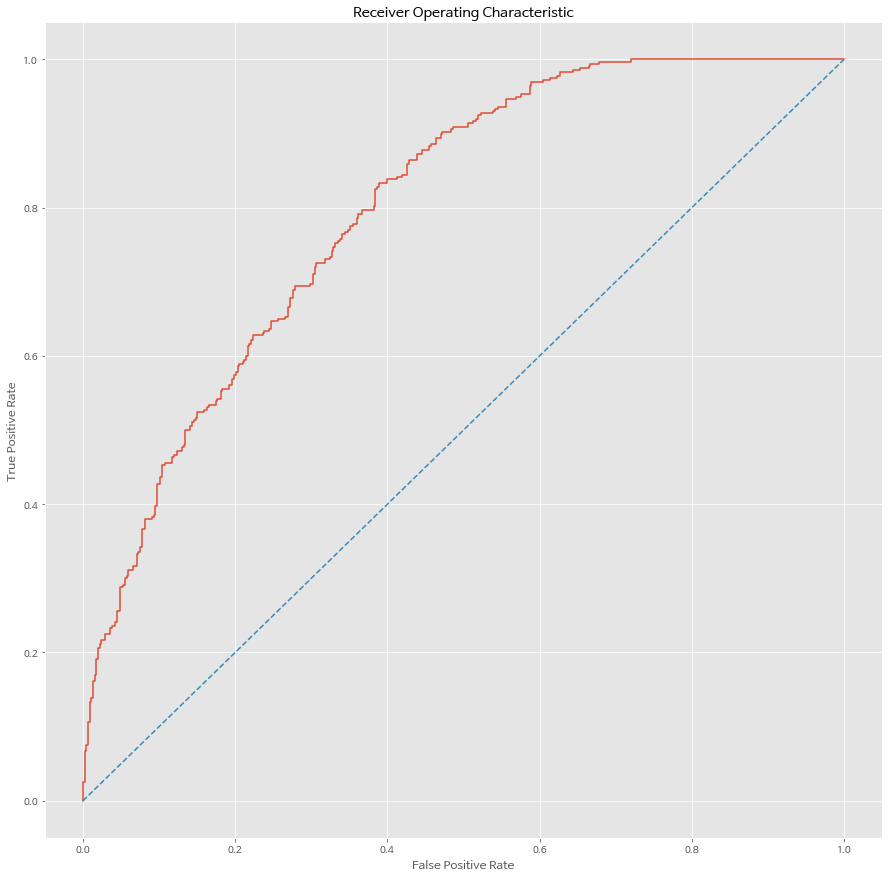

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### XGBoost 하이퍼 파라미터 조정 1




In [ ]:
from xgboost import XGBClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    XGBClassifier(random_state=42, n_jobs=-1)
)

dists = {        
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbclassifier__n_estimators': [10, 100, 500], 
    'xgbclassifier__max_depth': [10, 100, 500], 
    'xgbclassifier__eta' : [0, 0.5, 1]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'xgbclassifier__eta': 0, 'xgbclassifier__max_depth': 100, 'xgbclassifier__n_estimators': 500}
최적 스코어:  0.6554565494394673


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       453
           1       0.69      0.65      0.67       360

    accuracy                           0.72       813
   macro avg       0.71      0.71      0.71       813
weighted avg       0.71      0.72      0.71       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6695278969957081


##### AUC Score, ROC Curve

AUC score:  0.8079838116261957


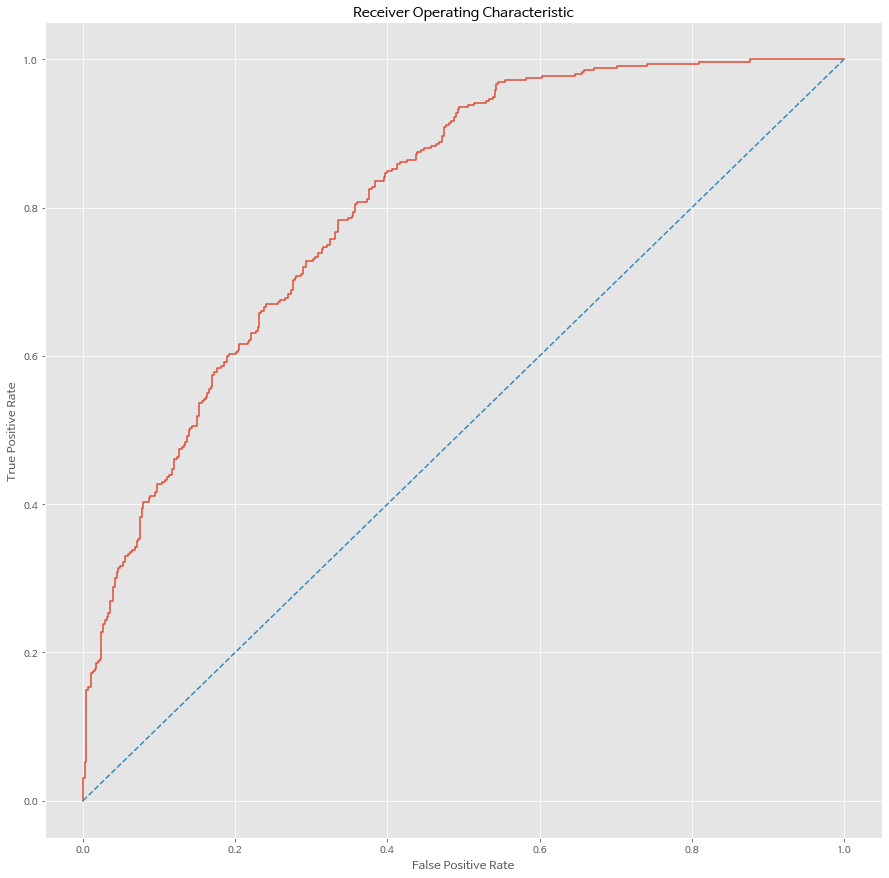

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### XGBoost 하이퍼 파라미터 조정 2

In [ ]:
from xgboost import XGBClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    XGBClassifier(random_state=42, n_jobs=-1, eta=0)
)

dists = {        
    'xgbclassifier__n_estimators': [200, 500, 800], 
    'xgbclassifier__max_depth': [5, 10, 15], 
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적 하이퍼파라미터:  {'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 200}
최적 스코어:  0.6582693905077293


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       453
           1       0.69      0.68      0.69       360

    accuracy                           0.72       813
   macro avg       0.72      0.72      0.72       813
weighted avg       0.72      0.72      0.72       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6853932584269664


##### AUC Score, ROC Curve

AUC score:  0.8086092715231789


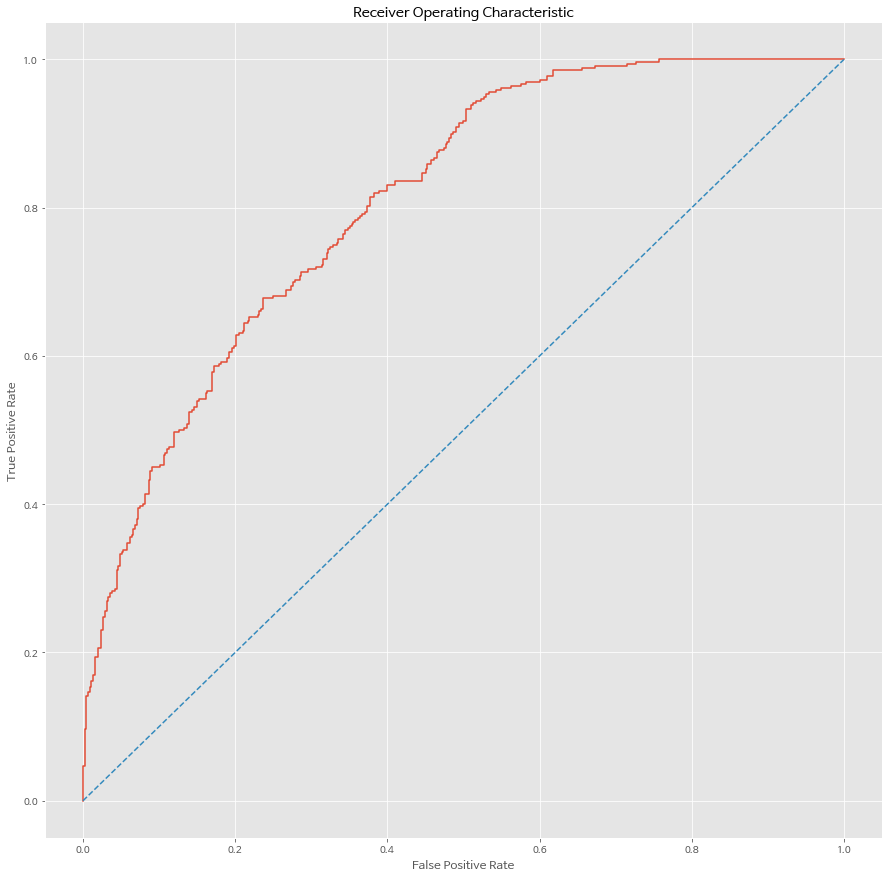

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### XGBoost 하이퍼 파라미터 조정 3

In [ ]:
from xgboost import XGBClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    XGBClassifier(random_state=42, n_jobs=-1, eta=0)
)

dists = {        
    'xgbclassifier__n_estimators': [150, 200, 250], 
    'xgbclassifier__max_depth': [8, 10, 12], 
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적 하이퍼파라미터:  {'xgbclassifier__max_depth': 8, 'xgbclassifier__n_estimators': 150}
최적 스코어:  0.6611500272099644


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       453
           1       0.68      0.65      0.66       360

    accuracy                           0.71       813
   macro avg       0.70      0.70      0.70       813
weighted avg       0.71      0.71      0.71       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6609929078014184


##### AUC Score, ROC Curve

AUC score:  0.8017108167770419


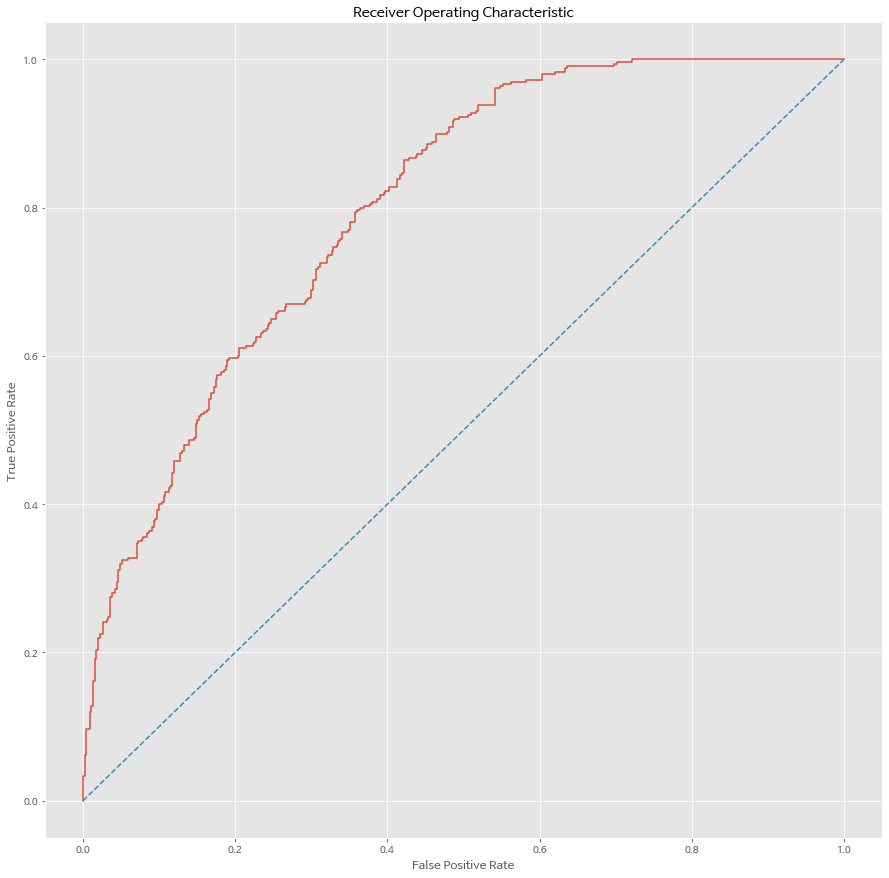

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 1

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    LGBMClassifier(random_state=42)
)

dists = {        
    'simpleimputer__strategy': ['mean', 'median'],
    'lgbmclassifier__n_estimators': [100, 500, 1000], 
    'lgbmclassifier__max_depth': [100, 500, 1000], 
    'lgbmclassifier__eta' : [0, 0.5, 1]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
최적 하이퍼파라미터:  {'lgbmclassifier__eta': 0, 'lgbmclassifier__max_depth': 100, 'lgbmclassifier__n_estimators': 1000, 'simpleimputer__strategy': 'mean'}
최적 스코어:  0.6484324074713114


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       453
           1       0.67      0.63      0.65       360

    accuracy                           0.70       813
   macro avg       0.69      0.69      0.69       813
weighted avg       0.69      0.70      0.70       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6466380543633763


##### AUC Score, ROC Curve

AUC score:  0.7977986264410106


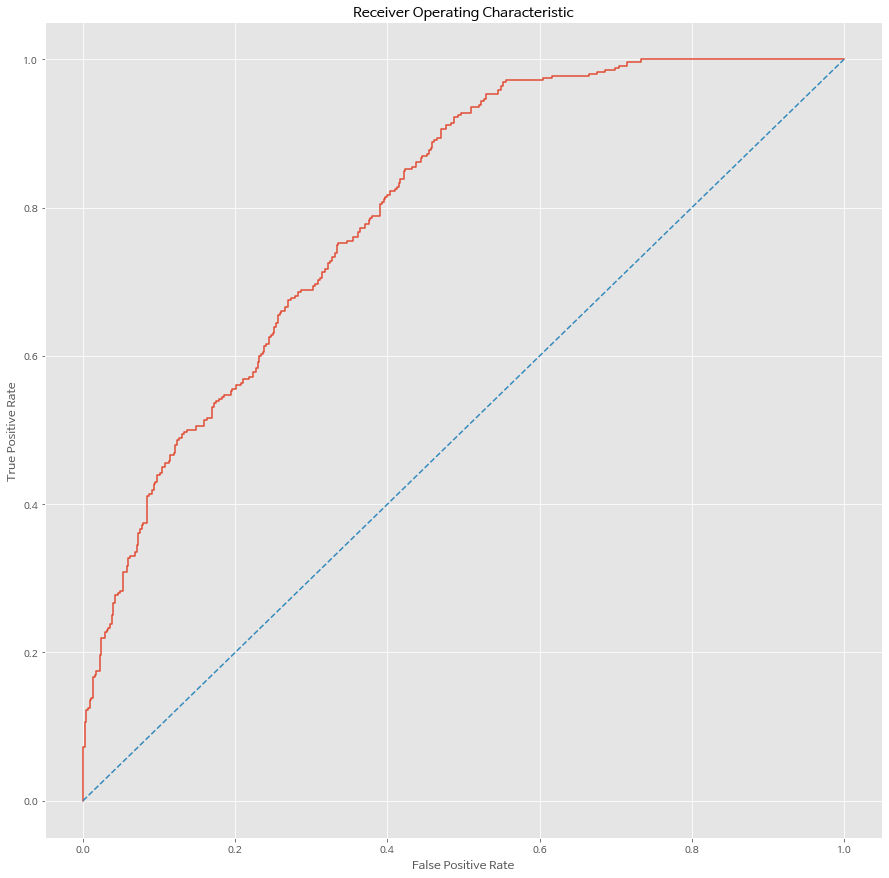

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 2

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = 'mean'), 
    LGBMClassifier(random_state=42, eta=0)
)

dists = {        
    'lgbmclassifier__n_estimators': [700, 1000, 1200], 
    'lgbmclassifier__max_depth': [50, 100, 200], 
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적 하이퍼파라미터:  {'lgbmclassifier__max_depth': 50, 'lgbmclassifier__n_estimators': 700}
최적 스코어:  0.6519227651382182


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       453
           1       0.68      0.64      0.66       360

    accuracy                           0.70       813
   macro avg       0.70      0.70      0.70       813
weighted avg       0.70      0.70      0.70       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6561604584527221


##### AUC Score, ROC Curve

AUC score:  0.7989269070394898


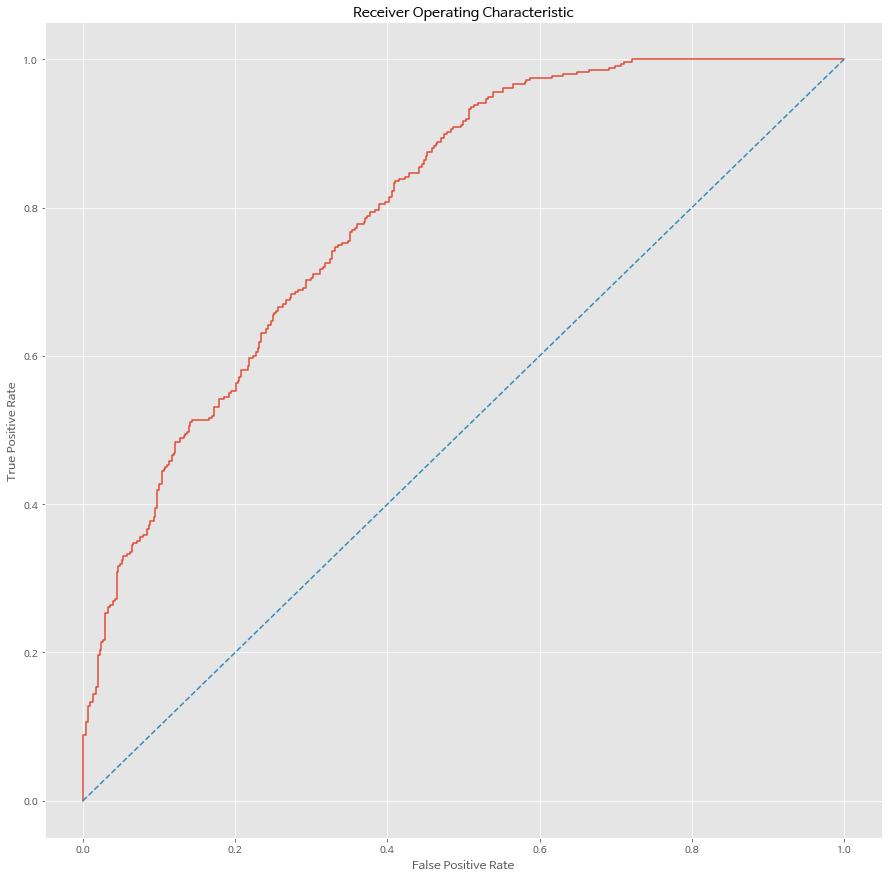

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 3

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = 'mean'), 
    LGBMClassifier(random_state=42, eta=0)
)

dists = {        
    'lgbmclassifier__n_estimators': [600, 700, 800], 
    'lgbmclassifier__max_depth': [35, 50, 65],
    'lgbmclassifier__min_child_samples': [5, 10, 20]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'lgbmclassifier__max_depth': 35, 'lgbmclassifier__min_child_samples': 10, 'lgbmclassifier__n_estimators': 600}
최적 스코어:  0.6586504256120311


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       453
           1       0.68      0.65      0.66       360

    accuracy                           0.71       813
   macro avg       0.70      0.70      0.70       813
weighted avg       0.71      0.71      0.71       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6638418079096046


##### ACU Score, ROC Curve

AUC score:  0.8130672062791269


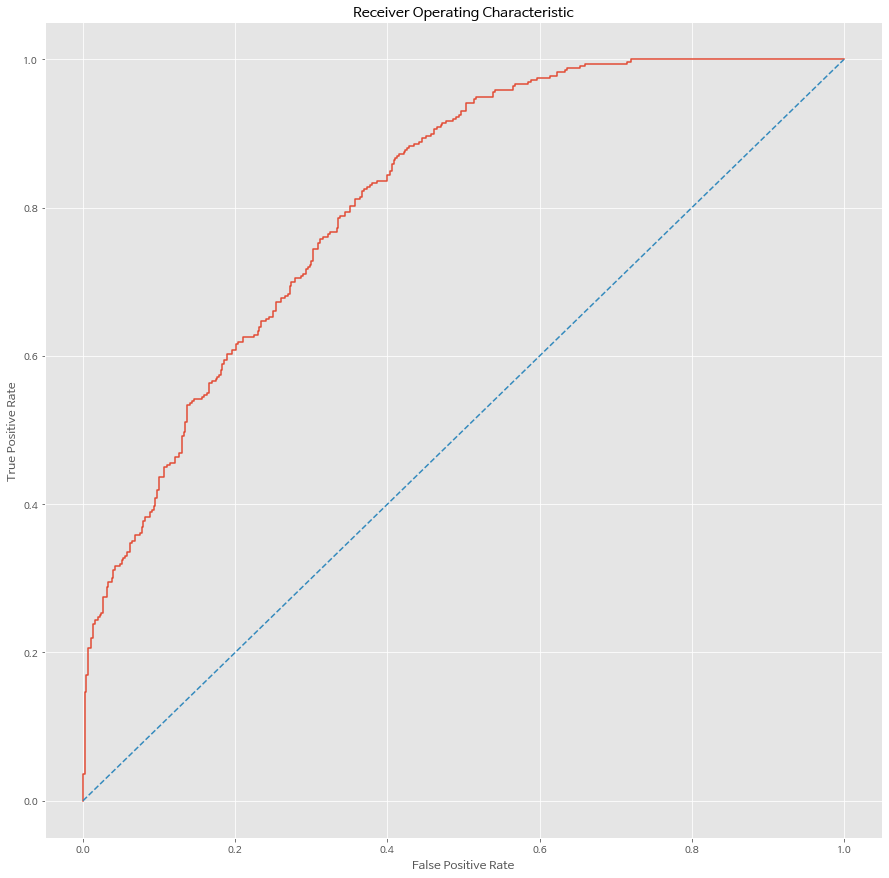

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 4

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = 'mean'), 
    LGBMClassifier(random_state=42, eta=0)
)

dists = {        
    'lgbmclassifier__n_estimators': [550, 600, 650], 
    'lgbmclassifier__max_depth': [32, 35, 38],
    'lgbmclassifier__min_child_samples': [8, 10, 12]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_batter_train, y_batter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'lgbmclassifier__max_depth': 32, 'lgbmclassifier__min_child_samples': 10, 'lgbmclassifier__n_estimators': 600}
최적 스코어:  0.6586504256120311


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_batter_val)
print(classification_report(y_batter_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       453
           1       0.68      0.65      0.66       360

    accuracy                           0.71       813
   macro avg       0.70      0.70      0.70       813
weighted avg       0.71      0.71      0.71       813



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_batter_val)
print("F1-Score :",f1_score(y_batter_val, y_pred))

F1-Score : 0.6638418079096046


##### AUC Score, ROC Curve

AUC score:  0.8130672062791269


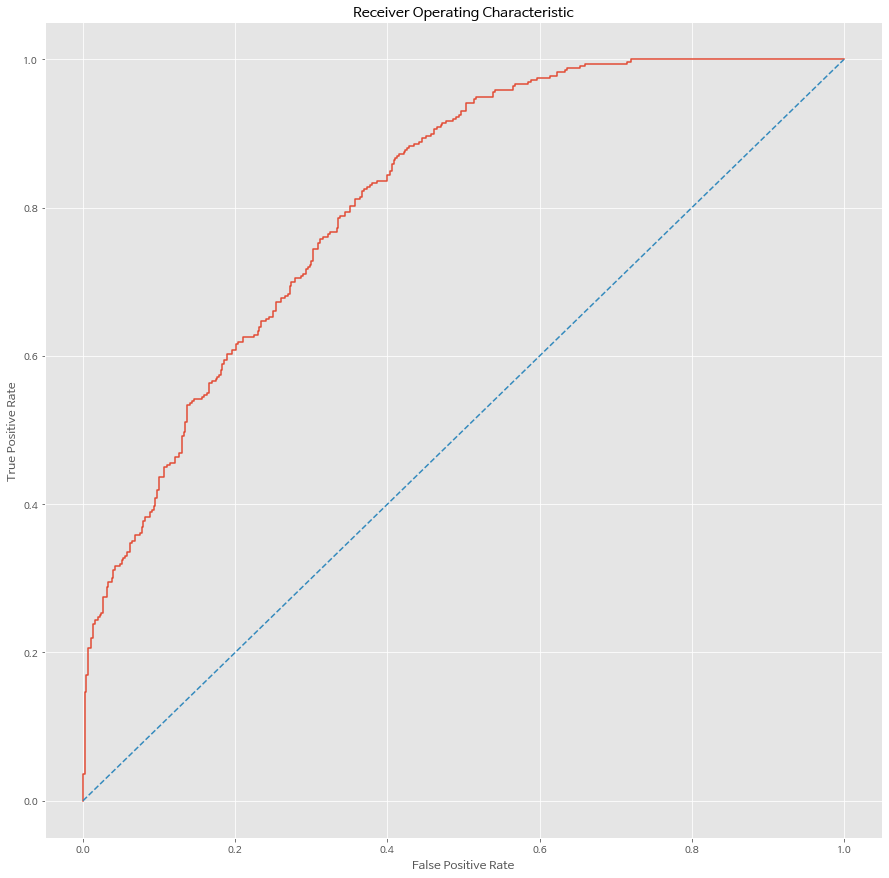

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_batter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_val, [0] * len(y_batter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### 순열중요도

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(), SimpleImputer(strategy = 'mean'))),
    ('xgb', XGBClassifier(random_state=42, eta=0, max_depth=10, n_estimators=200))
    ])
pipe.fit(X_batter_train, y_batter_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('targetencoder',
                                  TargetEncoder(cols=['포지션', '팀'])),
                                 ('simpleimputer', SimpleImputer())])),
                ('xgb',
                 XGBClassifier(eta=0, max_depth=10, n_estimators=200,
                               random_state=42))])

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xgb'], 
    scoring='roc_auc', 
    n_iter=5, 
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_train_val_transformed = pipe.named_steps['preprocessing'].transform(X_batter_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train_val_transformed, y_batter_val);

In [ ]:
feature_names = X_batter_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

팀               0.176404
중앙펜스            0.066933
타점              0.025364
경기수             0.024775
득점              0.016396
wOBA            0.011587
펜스높이            0.010874
Golden_Glove    0.009795
삼진              0.006838
병살              0.006366
wRC+            0.006166
타수              0.005476
장타              0.005189
루타              0.003642
포지션             0.003392
타율              0.002987
출루              0.002707
타석              0.002320
고의사구            0.001703
볼넷              0.001684
희타              0.001446
홈런              0.001334
도실              0.001224
평균이상타자          0.000732
OPS             0.000714
안타              0.000640
희비              0.000009
투수친화            0.000000
규정타석            0.000000
몸에맞는공          -0.000031
도루             -0.000226
3루타            -0.000513
2루타            -0.000527
1루타            -0.000617
나이             -0.002571
WAR+           -0.004058
dtype: float64

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xgb'], 
    scoring='f1', 
    n_iter=5, 
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_train_val_transformed = pipe.named_steps['preprocessing'].transform(X_batter_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train_val_transformed, y_batter_val);

In [ ]:
feature_names = X_batter_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

팀               0.147989
중앙펜스            0.095041
타점              0.033746
타수              0.027066
루타              0.019681
타석              0.017982
포지션             0.017411
볼넷              0.016880
출루              0.016529
Golden_Glove    0.016461
WAR+            0.015898
홈런              0.015740
도실              0.015156
펜스높이            0.014776
장타              0.014711
도루              0.013196
wOBA            0.012863
삼진              0.012459
wRC+            0.012173
고의사구            0.012012
OPS             0.011859
희타              0.011458
병살              0.010385
안타              0.008782
1루타             0.008391
득점              0.007744
몸에맞는공           0.007399
희비              0.007213
타율              0.005530
3루타             0.004882
경기수             0.004537
나이              0.004470
평균이상타자          0.001551
2루타             0.000045
투수친화            0.000000
규정타석            0.000000
dtype: float64

#### 순열중요도 - 인 특성 제거 후 모델 학습

In [ ]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_batter_train.columns[mask]
X_batter_train_selected = X_batter_train[features]
X_batter_val_selected = X_batter_val[features]
X_batter_test_selected = X_batter_test[features]

In [ ]:
pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    XGBClassifier(random_state=42, eta=0, max_depth=10, n_estimators=200)
)

pipe.fit(X_batter_train_selected, y_batter_train)

Pipeline(steps=[('targetencoder', TargetEncoder(cols=['포지션', '팀'])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(eta=0, max_depth=10, n_estimators=200,
                               random_state=42))])

##### Classification Report

In [ ]:
y_pred = pipe.predict(X_batter_test_selected)
print(classification_report(y_batter_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       567
           1       0.66      0.67      0.67       449

    accuracy                           0.70      1016
   macro avg       0.70      0.70      0.70      1016
weighted avg       0.70      0.70      0.70      1016



##### F1-Score

In [ ]:
y_pred = pipe.predict(X_batter_test_selected)
print("F1-Score :", f1_score(y_batter_test, y_pred))

F1-Score : 0.6681367144432194


##### AUC Score, ROC Curve

AUC score:  0.808333627932737


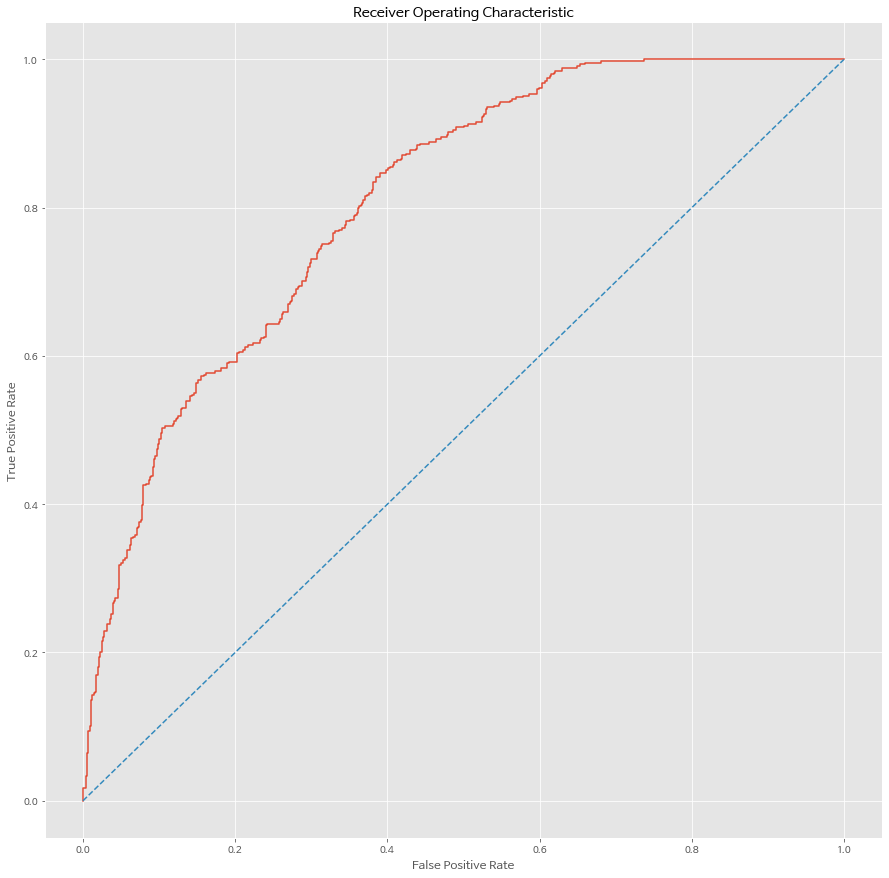

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe.predict_proba(X_batter_test_selected)[:, -1]
print('AUC score: ', roc_auc_score(y_batter_test, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_batter_test, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_batter_test, [0] * len(y_batter_test))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

In [ ]:
boosting = XGBClassifier(random_state=42, 
                         eta=0, 
                         max_depth=10, 
                         n_estimators=200)

In [ ]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_batter_train_selected)
X_val_encoded = encoder.transform(X_batter_val_selected)
X_test_encoded = encoder.transform(X_batter_test_selected)

boosting.fit(X_train_encoded, y_batter_train)

XGBClassifier(eta=0, max_depth=10, n_estimators=200, random_state=42)

In [ ]:
import shap
explainer = shap.TreeExplainer(boosting)

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test_encoded)

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


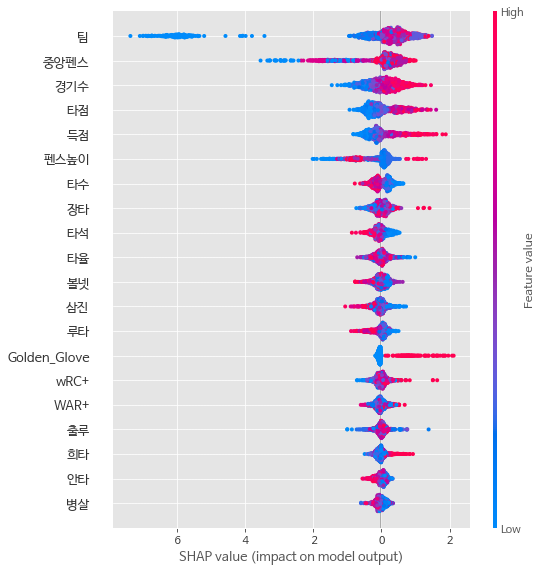

In [ ]:
# summary plot
shap.summary_plot(shap_values, X_test_encoded)